# Part 1: 2D Convolution + SIFT

1. Write a program for the image 2D convolution. It should be able to process any grayscale input image, and operate using the following kernels:
   -  Sobel kernel,
   - Gaussian kernel,
   - The 5 Haar-like masks (note, for this part, the user should be able to set the scale of the masks)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [12]:
def conv2d(image, kernel):

    kernel = np.flipud(np.fliplr(kernel))
    i_rows, i_cols = image.shape
    k_rows, k_cols = kernel.shape

    # Create an output image with the same dimensions as the input image
    output = np.zeros_like(image)

    # Pad the input image with zeros
    padded_image = np.zeros((i_rows + k_rows - 1, i_cols + k_cols - 1))
    padded_image[k_rows - 1:i_rows + k_rows - 1, k_cols - 1:i_cols + k_cols - 1] = image.copy()


    # Perform convolution
    for i in range(i_rows):
        for j in range(i_cols):
            output[i, j] = (kernel * padded_image[i:i + k_rows, j:j + k_cols]).sum()
            
    return output

In [ ]:
def Sobel_kernel(size):
    if size == 3:
        return np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    else:
        kernel = np.zeros((size, size))
        mid = size // 2
        for i in range(size):
            for j in range(size):
                if i == mid:
                    kernel[i][j] = (j - mid) / (mid + 1)
                elif j == mid:
                    kernel[i][j] = (i - mid) / (mid + 1)
                else:
                    kernel[i][j] = ((i - mid) / (mid + 1)) * ((j - mid) / (mid + 1))
        return kernel

In [97]:
def Gaussian_kernel(size, sigma=1):
    x, y = np.meshgrid(np.linspace(-sigma, sigma, size), np.linspace(-sigma, sigma, size))
    d = np.sqrt(x * x + y * y)
    kernel = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
    kernel /= (2 * np.pi * sigma**2)
    return kernel


In [13]:
# Sobel kernel 3*3

sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # vertical
sobel_h = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # horizontal


In [17]:
# Gaussian Kernel 7*7
gaussian_kernel = np.array([[0, 0, 0, 5, 0, 0, 0],
                            [0, 5, 18, 32, 18, 5, 0],
                            [0, 18, 64, 100, 64, 18, 0],
                            [5, 32, 100, 100, 100, 32, 5],
                            [0, 18, 64, 100, 64, 18, 0],
                            [0, 5, 18, 32, 18, 5, 0],
                            [0, 0, 0, 5, 0, 0, 0]])

In [44]:
def haar_masks(scale):
    block=np.ones([scale,scale]).astype(int)
    mask_1=np.concatenate([-1*block,block],axis=0)
    mask_2=np.concatenate([-1*block,block],axis=1)
    mask_3=np.concatenate([block,-1*block,block],axis=0)
    mask_4=np.concatenate([block,-1*block,block],axis=1)
    mask_5=np.concatenate([mask_1,-1*mask_1],axis=1)
    return [mask_1, mask_2, mask_3, mask_4, mask_5]

2. Show the results of the convolution with each of the kernels above on this image: https://tanrobby.github.io/teaching/ece_visual/assignment1/img/einstein.png

[[ 24  23  23 ...  28  29  30]
 [ 23  23  23 ...  29  30  32]
 [ 23  23  22 ...  30  30  32]
 ...
 [  6   6   6 ... 115 114 112]
 [ 13  13  12 ... 114 114 112]
 [  7   9   9 ... 112 112 110]]


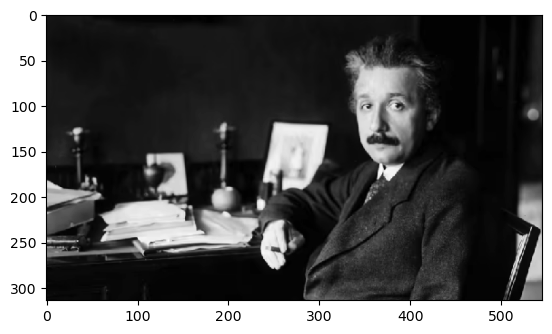

In [14]:
image_path  = '/Users/dailingyi/Desktop/NUS/ee5731/CA1/part1_1.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(image)
plt.imshow(image, cmap='gray')
plt.show()

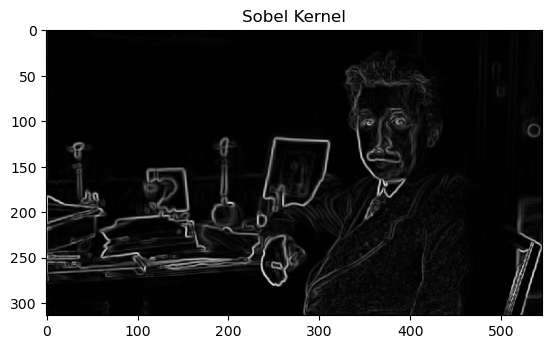

In [16]:
# Perform convolution using Sobel kernel
sobel_v_output = conv2d(image.astype(float), sobel_v)
sobel_h_output = conv2d(image.astype(float), sobel_h)
sobel_img = np.sqrt(sobel_v_output ** 2 + sobel_h_output ** 2)
sobel_img = (sobel_img / sobel_img.max()) * 255
sobel_img = sobel_img.astype(np.uint8)

plt.imshow(sobel_img,cmap='gray')
plt.title('Sobel Kernel')
plt.show()

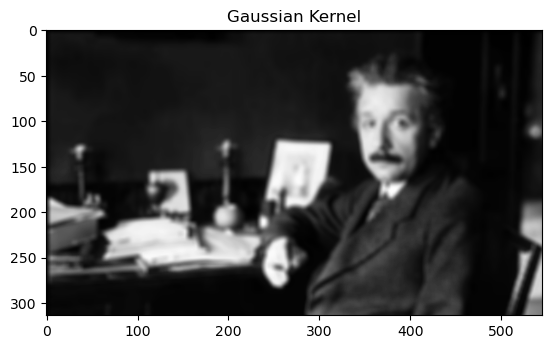

In [98]:
gaussian_kernel = Gaussian_kernel(7)
gaussian_output = conv2d(image.astype(float), gaussian_kernel)
gaussian_img = (gaussian_output/gaussian_output.max()) * 255
gaussian_img = gaussian_img.astype(np.uint8)

plt.imshow(gaussian_img,cmap='gray')
plt.title('Gaussian Kernel')
plt.show()

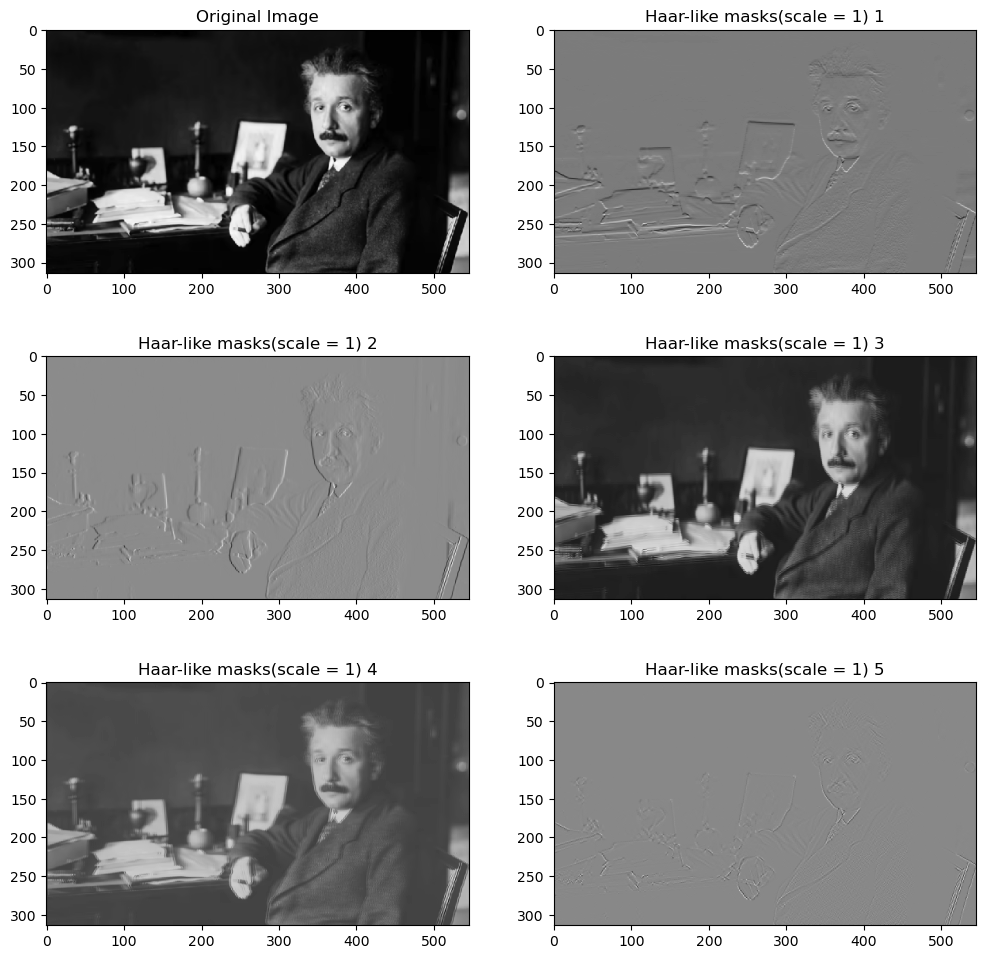

In [68]:
haar_like_scale = 1
_, axes = plt.subplots(3, 2, figsize=(12, 12))
i=0
axes[0, 0].imshow(image,cmap='gray')
axes[0, 0].set_title('Original Image')
for mask in haar_masks(haar_like_scale):
    i+=1
    haar_like_output = conv2d(image.astype(float), mask)
    haarlike_output = (haarlike_output/haarlike_output.max())*255

    row, col = divmod(i, 2)
    axes[row, col].imshow(haar_like_output, cmap='gray')

    title_text = f'Haar-like masks(scale = {haar_like_scale}) {i}'
    axes[row, col].set_title(title_text)


3. Write your conclusions on the outputs of each of the kernels, and explain how the size of the kernel influences the outputs.

- Conclusion:
    - The Sobel kernel is used for edge detection. 
    - The Gaussian kernel is used for blurring and noise reduction. 
    - For Haar-like: Type1 ouput is like sobel which used for edge detection. Type2 output is like gaussian which makes the image indistinct. Type3 looks like the combination of 2 ouputs in type1. 
- Influence:
  - Spatial Filtering and Detail Preservation: Smaller kernels capture finer details in the image but are more sensitive to noise. Larger kernels, on the other hand, smooth the image and reduce noise but may blur fine details.
  - Edge Detection: Smaller kernels are more sensitive to edges and can detect smaller structures in the image. 
  

4. Extract SIFT keypoints from im01.jpg using any publicly available SIFT code. Show the keypoints on the images, like shown below (similar but not necessarily the same):

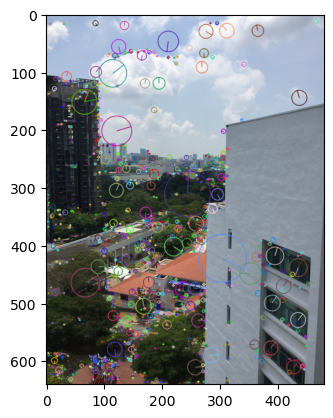

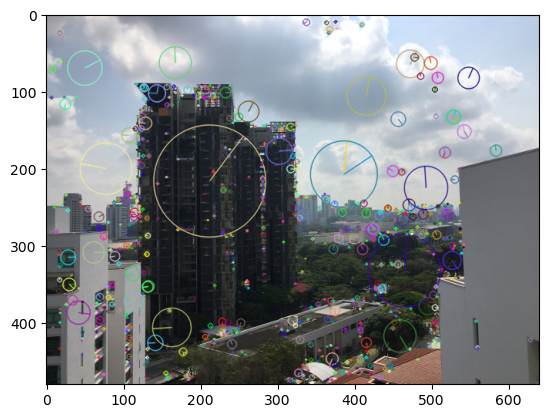

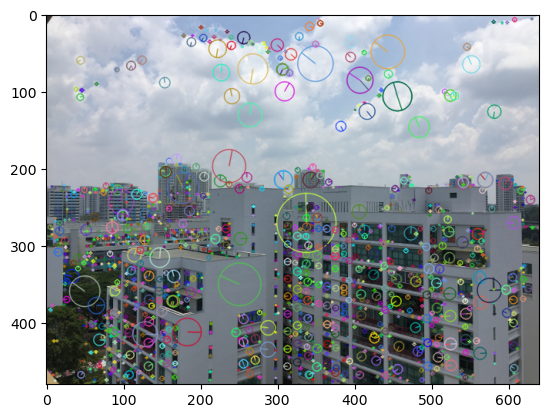

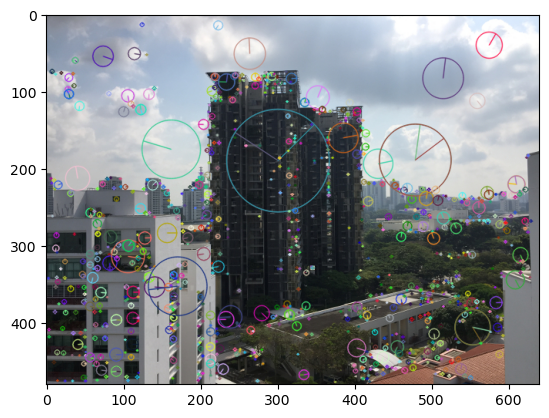

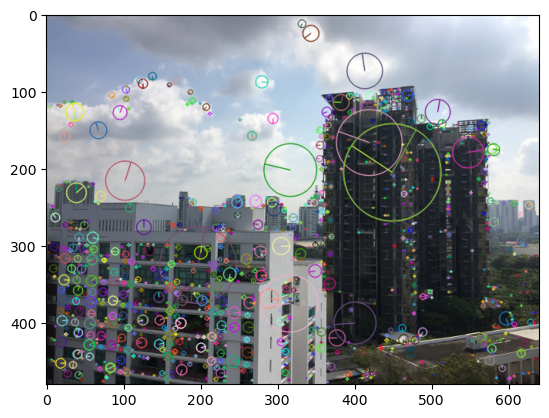

In [83]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = 'part1_4'


sift = cv2.SIFT_create()

image_keypoints_list = []

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    keypoints, _ = sift.detectAndCompute(img, None)
    image_keypoints_list.append((img, keypoints))

for img, keypoints in image_keypoints_list:
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.show()
